In [68]:
import os
import sys
sys.path.append ('/home/thierry/tmp/tensorflow-mnist-tutorial')
import tensorflow as tf
import tensorflowvisu
from tensorflow.examples.tutorials.mnist import input_data as mnist_data

import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


In [ ]:
mnist = mnist_data.read_data_sets ("data", one_hot=True, reshape=False, validation_size=0)

In [ ]:
mnist.train.num_examples

In [1]:
import tensorflow as tf
import numpy as np

In [ ]:
np.random.seed (1234)
theta = np.random.uniform (-np.pi, np.pi)
M = tf.Variable ([[np.cos (theta), -np.sin (theta)],[np.sin (theta), np.cos (theta)]])
MT = tf.matrix_transpose (M)
MMT = tf.matmul (M,MT)

In [ ]:
init = tf.global_variables_initializer ()
sess = tf.Session ()
sess.run(init)


In [ ]:
w, wt, wwt = sess.run ([M, MT, MMT])

In [2]:
from sklearn.datasets import load_digits

digits = load_digits ()
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import IntSlider
from IPython.display import display
from ipywidgets import interact

%matplotlib inline
%matplotlib notebook

In [ ]:
rgb = (digits.data.reshape ([-1, 64,1]) + np.zeros ([1797,64,3])).reshape ([-1,8,8,3])/20.0

rgb = digits.data.reshape ([-1,8,8])

imgplot = plt.imshow(rgb [0])

interact (lambda x: imgplot.set_data (rgb[x]), x=IntSlider(min=0,max=rgb.shape[0]-1, value=0, step=1))

In [3]:
import bqplot as bq
from IPython.display import display
import ipywidgets.widgets as widgets
from ipywidgets import Layout, Button

class LinesMonitor:
    def __init__(self, y_scale_init = (0.0, 1.0)):
        self.xs = []
        self.ys = []
        self.x_scale = bq.LinearScale (min=0.0, max=5.0)
        self.y_scale = bq.LinearScale (min=y_scale_init [0], max=y_scale_init [1])
        x_axis = bq.Axis (scale=self.x_scale)
        y_axis = bq.Axis (scale=self.y_scale, orientation='vertical')
        self.line = bq.Lines (x=self.xs, y=self.ys, scales={'x': self.x_scale, 'y': self.y_scale})
        self.fig = bq.Figure (marks=[self.line], axes=[x_axis, y_axis])
        
    def addPoint (self, i, value):
        value = float (value)
        if i > self.x_scale.max:
            self.x_scale.max = i + 5
        if value > self.y_scale.max:
            self.y_scale.max = value
            self.y_scale.max = self.y_scale.max + (self.y_scale.max - self.y_scale.min)/10.0
        if value < self.y_scale.min:
            self.y_scale.min = value
            self.y_scale.min = self.y_scale.min - (self.y_scale.max - self.y_scale.min)/10.0
        self.xs.append (i)
        self.ys.append (value)
        self.line.x = self.xs
        self.line.y = self.ys
        

In [4]:
I = [i for i in range (digits.data.shape[0])]
np.random.shuffle (I)
train_size = 1000
I_train = I [:train_size]
I_test = I [train_size:]
targets_onehot = np.eye (10, dtype=np.float32)[digits.target]
digits_test = digits.data [I_test]
targets_test = targets_onehot [I_test]
digits_train = digits.data [I_train]
targets_train = targets_onehot [I_train]


In [88]:
tf.set_random_seed(0)

Hidden1Size = 10
B0 = tf.abs (tf.Variable (tf.truncated_normal ([Hidden1Size], stddev=0.1, dtype=tf.float32)))
W0 = tf.Variable (tf.truncated_normal ([64,Hidden1Size], stddev=0.001, dtype=tf.float32))

W = tf.Variable (tf.truncated_normal ([Hidden1Size,64], stddev=0.001, dtype=tf.float32))
B = tf.Variable (tf.zeros ([64], dtype=tf.float32))

digits_in = tf.placeholder (tf.float32, shape=[None,64])
lr = tf.placeholder (tf.float32)

L1 = digits_in @ W0 + B0
A1 = tf.nn.relu (L1)

L = tf.matmul (A1, W) + B
A = tf.nn.sigmoid (L)

S = tf.sigmoid (digits_in)
diff = (A - S)
D2 = tf.reduce_mean (diff * diff)

train_step = tf.train.AdamOptimizer (lr).minimize (D2)
init = tf.global_variables_initializer ()
sess = tf.Session ()
sess.run(init)


In [89]:
m = LinesMonitor ()
display (m.fig)

dic = {digits_in: digits_test}
d2, = sess.run ([D2], feed_dict=dic)
m.addPoint (1,d2)
lrmin = 0.001
lrmax = 0.003

for i in range (2, 20001):
    lrnow = lrmin + (lrmax - lrmin) * np.exp (-i/10000)
    #lrnow = 0.003
    batch = np.random.choice (I_train, 100)
    dic = {digits_in: digits.data [batch], lr: lrnow}
    sess.run (train_step, feed_dict=dic)
    dic = {digits_in: digits_test}
    d2, = sess.run ([D2], feed_dict=dic)
    if i % 1000 == 1:
        m.addPoint (i, d2)



Figure(axes=[Axis(scale=LinearScale(max=5.0, min=0.0)), Axis(orientation='vertical', scale=LinearScale(max=1.0, min=0.0))], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Lines(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(max=5.0, min=0.0), 'y': LinearScale(max=1.0, min=0.0)}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9})], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0))

In [78]:
a,l1 = sess.run([A,L1], feed_dict={digits_in: digits_test})

In [79]:
l1.shape

(797, 64)

In [46]:
l1 [0:10]

array([[ -6.13072014,   3.16380143],
       [ -5.6989193 ,  -0.35304856],
       [ -6.04827595,   2.95955753],
       [ -5.0600338 ,   6.84634304],
       [ -5.62634659,  11.92659473],
       [ -5.76606846,   2.68178797],
       [ -5.35587597,  11.29274082],
       [ -5.84988308,   7.4948554 ],
       [ -4.81037617,  11.23897743],
       [ -6.2247324 ,   1.5282886 ]], dtype=float32)

<IPython.core.display.Javascript object>


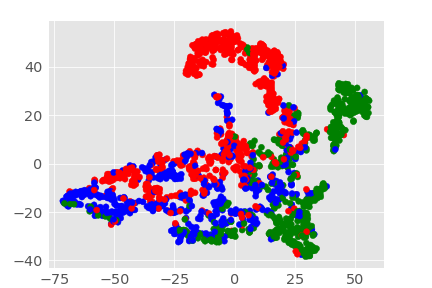

In [90]:
a,l1 = sess.run([A,L1], feed_dict={digits_in: digits.data})
colors = np.array (['r', 'g', 'b'])
projection = TSNE(n_components=2).fit_transform(l1)
plt.scatter (projection[:,0], projection[:,1], color = colors [digits.target % 3])


In [ ]:
for j in range (i+1, i+20001):
    lrnow = lrmin + (lrmax - lrmin) * np.exp (-j/10000)
    keepnow = keepmax - (keepmax - keepmin) * np.exp (-j / 5000)
    keepnow=1
    batch = np.random.choice (I_train, 100)
    dic = {digits_in: digits.data [batch], targets_in: targets_onehot [batch], keep: keepnow, lr: lrnow}
    #dic = {digits_in: digits_train, targets_in: targets_train}
    sess.run (train_step, feed_dict=dic)
    dic = {digits_in: digits_test, targets_in: targets_test, keep: 1.0}
    a,h = sess.run ([ACC,H], feed_dict=dic)
    if j % 1000 == 1:
        m.addPoint (j, a)
i=j
print (a)

In [ ]:
dic = {digits_in: digits.data, keep: 1.0}
layer1, = sess.run ([L1], feed_dict=dic)
projection = TSNE(n_components=2).fit_transform(layer1)

In [ ]:
layer1.shape

In [ ]:
plt.scatter (projection[:,0], projection[:,1])

In [ ]:
rawproj = TSNE(n_components=2).fit_transform(digits.data)
plt.scatter (rawproj[:,0], rawproj[:,1])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/thierry/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/sample_data/goog.npz'

In [3]:
import matplotlib.cbook as cbook
help (cbook)


Help on module matplotlib.cbook in matplotlib:

NAME
    matplotlib.cbook

DESCRIPTION
    A collection of utility functions and classes.  Originally, many
    (but not all) were from the Python Cookbook -- hence the name cbook.
    
    This module is safe to import from anywhere within matplotlib;
    it imports matplotlib only at runtime.

CLASSES
    builtins.UserWarning(builtins.Warning)
        IgnoredKeywordWarning
        MatplotlibDeprecationWarning
    builtins.dict(builtins.object)
        Xlator
        maxdict
    builtins.list(builtins.object)
        silent_list
    builtins.object
        Bunch
        CallbackRegistry
        GetRealpathAndStat
        Grouper
        Locked
        MemoryMonitor
        Null
        RingBuffer
        Sorter
        Stack
        converter
            todate
            todatetime
            tofloat
            toint
            tostr
    
    class Bunch(builtins.object)
     |  Often we want to just collect a bunch of stuff togethe